In [1]:
%%javascript
$.getScript('ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

[comment]: <> (emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ### <left>ESTP-Cachan </left>  <right> ESTP-Cachan </right> )

<div style="float: left; margin-right: 20px;font-size:20px" ><b> ESTP-Cachan </b></div> <div style="float: right; margin-right: 20px;font-size:20px" ><b> Février 2020 </b></div>
&nbsp;
<hr> </hr>

<div style="text-align: center;font-size:30px;font-weight:bold"> Application 4 : simulation </div>
<hr> </hr>


[comment]: <> (# <div style="text-align: left"> your-text-here</div> <div style="text-align: right"> your-text-here </div> <a href="https://en.wikipedia.org">click me</a> we have three types of horizontal rules ---- ; _____ ; ***** and we can also do tables)  
   

<div style="float: left; margin-right: 20px;font-size:27px;font-weight:bold" id="tocheading">Table of Contents</div>
<div style="height:30px" id="spacebeforetoc"> </div>
<div style="font-size:20px;font-weight:bold" id="toc"></div>

<div style="float: left; margin-right: 20px;font-size:27px;font-weight:bold" id="tocheading">Importer les packages (obligatoire)</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1: simulation loi Binomiale

Le but de cette application est de simuler des réalisations de plusieurs variables aléatoires à partir d'une loi uniforme sur $[0,1]$.

On commence donc par présenter comment simuler des réalisations d'une loi uniforme sur $[0,1]$.

In [3]:
nb_var = 6 ## nombre de réalisations de la loi uniforme.
u = np.random.rand(nb_var)
print(u)

[0.35146664 0.5186887  0.67712044 0.16353565 0.6543597  0.28143815]


1. Soit $X$ une variable aléatoire suivant une loi de Bernoulli de paramètre $p \in [0,1]$. Proposer un algorithme pour simuler $X$ et implémenter une fonction ``Simu_Bernoulli`` qui simule $n$ réalisations de $X$.

In [4]:
def Simu_Bernoulli(p, n):
    u = np.random.rand(n)
    return (u <= p).astype('int32')
p = 0.5
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_Bernoulli(p, n)))

 On obtient les 6 réalisations suivantes pour X : [0 1 0 1 1 0] 


2. Soit $Y$ une variable aléatoire suivant une loi Binomiale de paramètre $n \in \mathbb{N}^*$ et $p \in [0,1]$. En utilisant le résultat de la première question, implémenter une fonction ``Simu_Bino`` qui prend $n$ réalisations de $X$ et qui renvoie une réalisation de $Y$. Tester la.

In [5]:
def Simu_Bino(X):
    return X.sum()
p = 0.5
n = 6
print(" On obtient la réalisation suivante pour Y : %s " %(Simu_Bino(Simu_Bernoulli(p, n))))

 On obtient la réalisation suivante pour Y : 2 


3. On considère le jeu suivant: vous lancez $1000$ fois une pièce de monnaie non-biaisée en l'air et à chaque fois que vous obtenez face vous remportez $10$ centimes. Grâce à la question précédente, écrire une fonction ``Gain_moyen`` qui permet d'estimer votre gain moyen. Comparer l'estimation à la valeur théorique. 

In [6]:
def Gain_moyen():
    res = 0
    for i in range(500):
        nb_pile = Simu_Bino(Simu_Bernoulli(0.5, 1000)) 
        res += nb_pile*0.1    
    return res/500
gain_approx = Gain_moyen()
gain_theo = 0.5*1000*0.1
print(" Le gain estimé est %3.3f alors que le gain théorique vaut %3.2f" %(gain_approx,gain_theo))

 Le gain estimé est 49.946 alors que le gain théorique vaut 50.00


4. On reprend le même jeu. En utilisant la question 2, écrire la fonction ``Plus_que_52`` qui estime la probabilité de gagner plus que $52$ euros. Que remarquez-vous?

In [7]:
def Plus_que_52():
    res = 0.
    for i in range(500):
        nb_pile = Simu_Bino(Simu_Bernoulli(0.5, 1000)) 
        res += ((nb_pile*0.1) >= 52)
    return res/500.
proba_approx = Plus_que_52()
print(" Le gain estimé est %3.3f." %proba_approx)

 Le gain estimé est 0.100.


# Exercice 2: simulation loi Géométrique

Le but de cet exercice est d'apprendre à simuler une variable aléatoire $X$ suivant une loi de Géométrique de paramètre $p \in [0,1]$. En utilisant que $X$ correspond aux nombre de répétitions nécessaires d'une variable de Bernoulli pour obtenir un succès, proposer un algorithme ``Simu_Geo1`` qui simule une réalisation de $X$.

In [8]:
def Simu_Geo1(p):
    count = 1
    u = np.random.rand() ## uniforme
    b = u<= p ## bernoulli
    while b == 0:
        u = np.random.rand() ## uniforme
        b = u<= p ## bernoulli  
        count += 1
    return count
p = 0.5
print(" On obtient la réalisation suivante pour Y : %s " % Simu_Geo1(p) )

 On obtient la réalisation suivante pour Y : 3 


2. Soit $U$ une variable uniforme sur $[0,1]$. Montrer que 
$$
X' = 1 + \lfloor \cfrac{\ln(U)}{\ln(1-p)} \rfloor,
$$
suit une loi de Géométrique de paramètre $p$.

3. En utilisant la question précédente, proposer une fonction ``Simu_Geo2`` qui produit $n$ réalisations de $X$.

In [9]:
def Simu_Geo2(p, n):
    u = np.random.rand(n)
    return 1 + (np.log(u)/np.log(1-p)).astype('int32')
p = 0.5
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_Geo2(p, n)))

 On obtient les 6 réalisations suivantes pour X : [1 2 1 4 1 1] 


4. Le vecteur $e_0$ ci-dessous contient $200$ réalisations d'une variable $X$ suivant une loi Géométrique dont on ne connait pas le paramètre $p \in [0,1]$. Ecrire une fonction ``Estim_p`` qui permet d'estimer $p$ à partir de $e_0$.

In [10]:
e_0 = np.array([5,7,1,3,1,2,3,4,2,3,7,1,4,2,4,3,5,7,4,2,2,8,3,4,14,7,1,2,2,2,1,1,7,1,5,5,4,2,1,3,6,2,1,1,
                3,9,3,8,4,1,2,1,1,1,4,6,2,10,3,1,3,1,4,5,2,4,2,4,4,1,1,1,6,1,2,2,3,4,12,3,1,2,4,1,1,2,4,2,
                5,2,1,3,2,1,5,1,5,5,6,2,2,3,2,1,2,8,3,1,10,1,1,1,3,1,1,3,6,1,5,4,3,2,2,1,1,3,1,5,11,1,1,1,
                2,13,4,4,3,13,1,1,5,2,1,1,1,10,4,2,3,1,2,2,3,7,1,1,2,1,3,1,2,3,1,1,1,2,4,6,1,5,15,2,2,2,5,
                1,1,4,3,2,5,2,1,2,3,9,1,1,1,4,2,5,7,3,1,6,1,2,1,7])

In [11]:
def Estim_p(e_0):
    return 1/e_0.mean()
estimated_p = Estim_p(e_0)
print(" La valeur estimée pour p est %3.3f." % estimated_p)

 La valeur estimée pour p est 0.310.


# Exercice 3: simulation loi de Poisson

1. Dans cet exercice, on souhaite simuler une variable $N$ suivant une loi de Poisson de paramètre $ \lambda > 0$. Soit $(Y_i)_{i\geq 1}$ des variables Exponentielles indépendantes de paramètre $\lambda$. Montrer que 
$$
N_1 = \inf\{i ; \; \sum_{j \leq i +1} Y_j \geq 1 \},
$$
suit une loi de Poisson de paramètre $\lambda$. 

2. En utilisant que $- \cfrac{\ln(U)}{\ln(1-p)} $ suit une loi Exponentielle de paramètre $\lambda$ pour toute variable $U$ sur $[0,1]$. Montrer que 
$$
N_2 = \inf\{i ; \; \prod_{j \leq i +1} U_j \leq e^{-\lambda} \},
$$
suit une loi de Poisson de paramètre $\lambda$ avec $(U_i)_{i\geq 1} $ des variables indépendantes toutes de loi uniforme sur $[0,1]$. 

3. En utilisant la question précédente, écrire une fonction ``Simu_Poisson`` qui simule une réalisation de $N$.

In [12]:
def Simu_Poisson(lambda_0):
    count = 0
    prod_cum = np.random.rand()
    seuil = np.exp(-lambda_0)
    while prod_cum > seuil:
        prod_cum *= np.random.rand()
        count += 1
    return count
lambda_0 = 1
print(" On obtient la réalisation suivante pour N : %s " % Simu_Poisson(lambda_0) )

 On obtient la réalisation suivante pour N : 0 


# Exercice 4: simulation loi uniforme

1. On veut simuler, dans cet exercice, une variable $X$ suivant une loi uniforme sur $\{0,\ldots,m-1\}$ avec $m \in \mathbb{N}^*$. Pour ce faire, on s'aide d'une variable $U$ uniforme sur $[0,1]$.
    1. Montrer que 
$$
X_1 = \lfloor m U \rfloor,
$$
suit la même loi que $X$. 
    2. En utilisant la question précédente, proposer une fonction ``Simu_U_m`` qui simule $n$ réalisations de $X$.

In [13]:
def Simu_U_m(m,n):
    u = np.random.rand(n)
    return (m * u).astype('int32')
m = 7
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_U_m(m,n)))

 On obtient les 6 réalisations suivantes pour X : [6 1 4 0 2 6] 


2. On souhaite maintenant simuler une variable $Y$ suivant une loi uniforme sur l'ensemble $\{a,\ldots,b\}$ avec $a < b \in \mathbb{Z}$. Pour ce faire, on utilise une variable $U$ uniforme sur $[0,1]$.
    1. Montrer que 
$$
X_1 = a + \lfloor (b-a+1) \times U \rfloor,
$$
suit la même loi que $Y$. 
    2. En utilisant la question précédente, proposer une fonction ``Simu_U_ab`` qui simule $n$ réalisations de $Y$.

In [14]:
def Simu_U_ab(a,b,n):
    u = np.random.rand(n)
    return a + ((b-a+1) * u).astype('int32')
a,b = -3,7
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_U_ab(a,b, n)))

 On obtient les 6 réalisations suivantes pour X : [-2  0  0  5  1 -1] 


3. On aimerait enfin simuler une variable $Z$ suivant une loi uniforme sur $[a,b]$ avec $a < b \in \mathbb{R}$. Pour ce faire, on recourt encore une fois à une variable $U$ uniforme sur $[0,1]$.
    1. Montrer que 
$$
Z_1 = a +  (b-a) \times U ,
$$
suit la même loi que $Z$. 
    2. En utilisant la question précédente, proposer une fonction ``Simu_U_abr`` qui simule $n$ réalisations de $Z$.

In [15]:
def Simu_U_abr(a,b,n):
    u = np.random.rand(n)
    return a + ((b-a) * u)
a,b = -3,7
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_U_abr(a,b, n).round(3)))

 On obtient les 6 réalisations suivantes pour X : [ 1.675  3.721 -0.316  3.047 -1.682 -1.423] 


# Exercice 5: simulation d'une loi discrète

1. L'objectif de cet exercice est de simuler une variable discrète $D$ à valeurs dans un ensemble fini $\{x_0,\ldots,x_m\}$ tel que 
$$
\mathbb{P}[X =  x_i ] = p_i, \qquad  \forall i \in \{0,\ldots, m\}.
$$


* Soit $U$ une variable aléatoire uniforme sur $[0,1]$. Montrer que
\begin{align*}
D_1 & = \sum_{i \leq m} x_i \mathbf{1}_{p_1+ \ldots + p_{i-1} < U \leq p_1+ \ldots + p_i}\\
    & = x_0\mathbf{1}_{U \leq p_0} + x_1 \mathbf{1}_{p_0 < U \leq p_0 + p_1}+ \ldots + x_i \mathbf{1}_{p_1 + \ldots + p_{i-1} < U \leq p_1+ \ldots + p_i} + \ldots x_m \mathbf{1}_{p_1 + \ldots + p_{m-1} < U \leq 1},
\end{align*}
admet la même distribution que $D$. 

2. Déduire de la question précédente une fonction ``Simu_D`` qui simule une réalisations de $D$.

In [16]:
def Simu_D(x,p):
    '''
    x : the vector of values 
    p : the vector of probabilities
    '''
    count = 0
    u = np.random.rand()
    cum_sum = p[count]
    while u > cum_sum:
        count += 1
        cum_sum += p[count]
    return x[count]
x = [0, 0.4, 2.4, 32, 47, 50]
p = [0.1, 0.2, 0.1 , 0.2, 0.3, 0.1]
print(" On obtient la réalisation suivante pour D : %3.2f " % Simu_D(x,p) )

 On obtient la réalisation suivante pour D : 2.40 


3. La méthode utilisée ressemble-t-elle à autre technique de simulation? Quelle est la relation entre les deux?

# Exercice 6: inversion de la fonction de répartition

Le but de cet exercice est de simuler plusieurs variables aléatoires en utilisant la méthode d'inversion de la fonction de répartition. Pour ce faire, on se donne une variable uniforme $U$.

1. Rappeler le principe de la méthode d'inversion de la fonction de répartition

2. **Simulation d'une loi exponentielle:** Soit $X$ une variable aléatoire suivant une loi Exponentielle de paramètre $\lambda > 0 $.
    1. Donner la fonction de répartition de $X$.
    2. Calculer l'inverse de la fonction de répartition.
    3. En utilisant la méthode d'inversion de la fonction de répartition, montrer que
$$
X_1 = -\cfrac{\ln(U)}{\lambda},
$$
       admet la même distribution que $X$. 
    4. Programmer une fonction ``Simu_Expo`` qui génère $n$ réalisations de $X$.

In [17]:
def Simu_Expo(lambda_0,n):
    u = np.random.rand(n)
    return - np.log(u)/lambda_0
lambda_0 = 3
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_Expo(lambda_0,n).round(3)))

 On obtient les 6 réalisations suivantes pour X : [0.11  0.061 0.836 0.072 0.166 0.058] 


2. **Simulation d'une loi de Cauchy:** Soit $Y$ une variable aléatoire suivant une loi de Cauchy, i.e. la densité de $X$ vaut 
$$
f_X(x) = \cfrac{c}{\pi (x^2 + c^2)}, \quad \forall x \in \mathbb{R},
$$
avec $c > 0 $.
    1. Donner la fonction de répartition de $X$.
    2. Calculer l'inverse de la fonction de répartition.
    3. En utilisant la méthode d'inversion de la fonction de répartition, montrer que
$$
Y_1 = c \tan(\pi U),
$$
       admet la même distribution que $Y$. 
    4. Programmer une fonction ``Simu_Cauchy`` qui génère $n$ réalisations de $Y$.

In [18]:
def Simu_Cauchy(c,n):
    u = np.random.rand(n)
    return c * np.tan( np.pi * u )
c = 1
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_Expo(lambda_0,n).round(3)))

 On obtient les 6 réalisations suivantes pour X : [0.749 0.348 0.103 0.141 0.539 0.153] 


2. **Simulation d'une loi de Pareto:** Soit $Z$ une variable aléatoire suivant une loi de Pareto, i.e. la densité de $Z$ vaut 
$$
f_Z(x) = \cfrac{\theta}{x^{1+\theta}}, \quad \forall x \geq 1,
$$
avec $\theta > 0 $.
    1. Donner la fonction de répartition de $X$.
    2. Calculer l'inverse de la fonction de répartition.
    3. En utilisant la méthode d'inversion de la fonction de répartition, montrer que
$$
Z_1 = U^{-1/\theta},
$$
       admet la même distribution que $Z$. 
    4. Programmer une fonction ``Simu_Pareto`` qui génère $n$ réalisations de $Z$.

In [19]:
def Simu_Pareto(theta,n):
    u = np.random.rand(n)
    return ( u**(-1/theta) )
theta = 1
n = 6
print(" On obtient les %i réalisations suivantes pour X : %s " %(n,Simu_Pareto(theta,n).round(3)))

 On obtient les 6 réalisations suivantes pour X : [1.607000e+00 1.251000e+00 7.439811e+03 4.368000e+00 1.800900e+01
 2.594000e+00] 


# Exercice 7: simulation par la méthode de rejet

Dans cet exercice, on veut simuler certaines variables aléatoires en utilisant la méthode de rejet. Pour ce faire, on se donne une variable uniforme $U$.

1. **Simulation d'une variable:** Soit $X$ une variable aléatoire suivant une loi $\Gamma(3/2,1)$, i.e. la densité de $X$ vaut 
$$
f_X(x) = \cfrac{2}{\sqrt{\pi}} x^{1/2} e^{-x}, \quad \forall x \geq 0.
$$
On veut simuler cette variable par la méthode de rejet en utilisant une variable Exponentielle $Y$ dont la densité vaut 
$$
f_Y(x) = \lambda e^{- \lambda x}, \quad \forall x \geq 0,
$$
avec $\lambda > 0 $.
    1. Montrer que
    $$
    c(\lambda) = \sup_{x \geq 0} \cfrac{f_X(x)}{f_Y(x)} = \left\{
    \begin{array}{ll}
    + \infty & \text{ si } \lambda> 1,\\
    \cfrac{2e^{-1/2}}{\sqrt{2 \pi \lambda^2 (1-\lambda)} }& \text{ si } \lambda \in ]0,1].
    \end{array}
    \right.
    $$
    2. Trouver $\lambda_m$ qui minimise $c(\lambda)$. 
    3. Déduire de la question précédente la loi Exponentielle à utiliser pour simuler $X$ et écrire fonction ``Simu_Rejet`` qui simule une réalisation de $X$.

In [20]:
def f_x(x): 
    return 2 * x**(1/2) * np.exp(-x) / (np.sqrt(np.pi ))

def f_y(x): 
    return 2/3 * np.exp(-2/3 * x)

def Simu_Rejet(f_x,f_y,c,gen_x):
    '''
    f_x : densité de X
    f_x : densité de Y 
    c : constante de la méthode de rejet
    gen_x :  fonction qui génère X
    '''
    u = np.random.rand()
    y = gen_x()
    while c * u * f_x(y) > f_y(y):
        u = np.random.rand()
        y = gen_x()
    return y

lambda_star = 2/3
gen_x = lambda : Simu_Expo(lambda_star,1)[0]
c = 3**(3/2) * np.exp(-1/2) / (np.sqrt( 2 * np.pi ))
print(" On obtient la réalisation suivante pour X : %3.2f " % Simu_Rejet(f_x,f_y,c,gen_x) )

 On obtient la réalisation suivante pour X : 0.71 


2. **Simulation d'une loi Gaussienne:** Soit $Z$ une variable aléatoire suivant une loi normale centrée réduite, i.e. la densité de $Z$ vaut 
$$
f_Z(x) = \cfrac{1}{\sqrt{2\pi}} e^{-x^2/2}, \quad \forall x \in \mathbb{R}.
$$
On veut simuler cette variable par la méthode de rejet en utilisant la loi double exponentielle $W$ dont la densité vaut 
$$
f_W(x) = \cfrac{1}{2} e^{- |x|}, \quad \forall x \in \mathbb{R}.
$$
    1. Montrer que
    $$
    c = \sup_{x \in \mathbb{R}} \cfrac{f_Z(x)}{f_W(x)} = \sqrt{\cfrac{2e}{\pi}}.
    $$
    2. Soit $E$ une variable exponentielle de paramètre $\lambda =1$ et $B$ une variable de Bernoulli de paramètre $ p= 1/2$. Montrer que
    $$
    W_1 = (2 B - 1) \times E ,
    $$
    suit la même loi que $W$.
    3. En utilisant les questions précédentes, proposer une fonction ``Simu_Rejet_G`` qui simule une réalisation de $Z$.

In [21]:
def f_z(x): 
    return  np.exp(-x*x/2) / (np.sqrt(2 * np.pi ))

def f_w(x): 
    return 0.5*np.exp(-abs(x))

def gen_w():
    b = Simu_Bernoulli(0.5, 1)[0]
    e = Simu_Expo(1,1)[0]
    return (2*b -1) * e
    
def Simu_Rejet_G():
    c = np.sqrt( 2 * np.exp(1)/ np.pi )
    y = Simu_Rejet(f_z,f_w,c,gen_w)
    return y
print(" On obtient la réalisation suivante pour Z : %3.2f " % Simu_Rejet_G() )

 On obtient la réalisation suivante pour Z : -0.68 


# Exercice 8: simulation d'un vecteur Gaussien

Dans cet exercice, on présente une méthode pour simuler des vecteurs Gaussiens. 

1. **Simulation de plusieurs Gaussiennes indépendantes:** On souhaite simuler $X = (X_1,X_2)$ deux variables Gaussiennes indépendantes. Pour ce faire, on utilise $R$ une variable exponentielle $1/2$ de paramètre et $\theta$ une variable uniforme sur $[0,2 \pi]$.
    1. Montrer que
    $$
    \big( \sqrt(R) \times \cos(\theta), \sqrt{R} \times \sin(\theta) \big),
    $$
    suit la même loi que $X$.
    2. Déduire de la question précédente, une fonction ``Simu_G2`` qui produit $2n$ réalisations de $X$.

In [22]:
def Simu_G2(n):
    r = Simu_Expo(0.5,n)
    theta  = Simu_U_abr(0,2 * np.pi,n)
    x_1 = np.sqrt(r) * np.cos(theta)
    x_2 = np.sqrt(r) * np.sin(theta)
    return np.concatenate([x_1 , x_2])
n= 3
print(" On obtient les %i réalisations suivantes pour X : %s " % (2*n,Simu_G2(n).round(3)) )

 On obtient les 6 réalisations suivantes pour X : [ 0.882 -0.406  0.471  2.168  0.078 -0.278] 


2. **Simulation d'un vecteur Gaussien 1:** Soit $m \in \mathbb{N}^*$. On souhaite simuler un vecteur Gaussien $X = (X_1,\ldots,X_m)$ de moyenne $m \in \mathbb{R}^d$ et de matrice de covariance $\Sigma = (\mathrm{Cov}(X_i,X_j))_{1\leq i,j \leq m}$ inversible, i.e. la densité de $X$ vaut 
$$
f_X(x) = \cfrac{1}{\sqrt{2 \pi}^{m/2} \sqrt{det(\Sigma)}} e^{- (x - m)^{\top} \Sigma^{-1} (x-m)/2 }, \qquad \forall x =  (x_1,\ldots,x_m) \in \mathbb{R}^m.
$$
Pour ce faire, on suppose qu'on sait simuler $Y = (Y_1,\ldots,Y_m) $ des variables gaussiennes centrées réduites indépendantes.
    1. Soit $A$ une matrice et $b$ un vecteur. Montrer que
    $$
    b + A Y,
    $$
    est un vecteur Gaussien de moyenne $b$ et de matrice de covariance $A A^{\top}$.
    2. Montrer que $\Sigma$ est symétrique positive, i.e. 
    $$
    \Sigma_{i,j} = \Sigma_{j,i}, \qquad x^{\top } \Sigma x \geq 0, \quad \forall x \in \mathbb{R}^m.
     $$
    En déduire l'existence d'une matrice $L$ tel que 
    $$
    \Sigma =  L L^{\top}.
    $$
    3. En utilisant la question précédente, écrire une fonction ``Simu_VG`` qui produit une réalisation de $X$.

In [23]:
def Simu_VG(m1, Sigma1):
    n = m1.shape[0]
    if n%2 == 0:
        y = Simu_G2(int(n//2))
    else:
        y = Simu_G2(int((n+1)//2))[:n]
    L1 = np.linalg.cholesky(Sigma1)
    return m1 + np.dot(L1,y)
m1 = np.array([1, - 2, 4])
Sigma1  = np.array([[ 1, -1, 0],
                    [ -1, 5, 6],
                    [ 0,  6, 10]])
print(" On obtient la réalisation suivante pour X : %s " % Simu_VG(m1, Sigma1).round(3) )

 On obtient la réalisation suivante pour X : [ 2.625 -3.383  6.328] 


2. **Simulation d'un vecteur Gaussien 2:** Soit $\Delta > 0$ un pas de temps et $m \in \mathbb{N}^*$. On observe aux instants $t_0,\ldots,t_m$ tel que 
$$
t_i = i \times \Delta, \qquad \forall i \in \{0,\ldots,m\},
$$
des variables $W_{t_0},\ldots, W_{t_m}$ où $W_{t_0} = 0$ et le vecteur $W = (W_{t_1},\ldots, W_{t_m}) $ est Gaussien de moyenne nulle et de matrice de covariance 
$$
\Sigma_{i,j} = \mathrm{Cov}(W_{t_i},W_{t_j}) = \cfrac{1}{2} \big(t_i^{2 H} + t_j^{2H} - |t_i - t_j|^{2H} \big),
$$
avec $H \in (0,1)$.
    1. On se place dans le cas $H = 1/2$. Montrer que 
    $$
    \mathrm{Cov}\big(W_{t_{i+1}} - W_{t_{i}},W_{t_{j+1}} - W_{t_{j}}\big) = 
    \left\{
    \begin{array}{ll}
    0 & \text{ si } i \ne j, \\
    \sqrt{t_{i+1} - t_{i}} & \text{ si } i = j.
    \end{array}
    \right.
    $$
    2. Ecrire une fonction ``Simu_DeltaW`` qui simule une réalisation du vecteur $\Delta W = (W_{t_1},\ldots, W_{t_m} - W_{t_{m-1}}) $. 
    3. En utilisant les questions précédentes, proposer une fonction ``Simu_W1`` qui génère une réalisation de $W$ en utilisant $\Delta W$.

In [24]:
def Simu_DeltaW(m, delta):
    if m%2 == 0:
        y = Simu_G2(int(m//2))
    else:
        y = Simu_G2(int((m+1)//2))[:m]  
    return np.sqrt(delta) * y
m = 10
delta = 0.1
print(r" On obtient la réalisation suivante pour $\Delta W$ : %s " % Simu_DeltaW(m, delta).round(3) )

 On obtient la réalisation suivante pour $\Delta W$ : [ 0.305  0.36   0.458 -0.363  0.073  0.32  -0.795  0.208 -0.336  0.384] 


In [25]:
def Simu_W1(m, delta):
    deltaw = Simu_DeltaW(m, delta)
    return deltaw.cumsum()
m = 10
delta = 0.1
print(r" On obtient la réalisation suivante pour $W$ : %s " % Simu_W1(m, delta).round(3) )

 On obtient la réalisation suivante pour $W$ : [-0.016 -0.605 -0.426 -0.139  0.736  0.804  0.942  1.052  0.753  1.022] 


2. **Simulation d'un vecteur Gaussien 3:** On se replace dans le même cadre que celui de la question 2 et on suppose cette fois que $H$ peut être différent de $1/2$.
    1. Ecrire une fonction ``Construire_Sigma`` qui renvoie la matrice de covariance de $W = (W_{t_1},\ldots, W_{t_m} - W_{t_{m-1}}) $. 
    2. En utilisant la questions précédente, programmer une fonction ``Simu_W2`` qui génère une réalisation de $W$.
    3. On simule ci-dessous plusieurs trajectoires pour différentes valeurs de $H$. Quel est l'effet de H?    

In [26]:
def Construire_Sigma(m,delta,h):
    Cov_mat = np.zeros((m,m))
    ### time_stamps
    t = delta*np.arange(m+1)
    t_power2h = t**(2*h)
    for i in range(m): 
        for j in range(i+1): 
            temp = 0.5 * (t_power2h[i+1] + t_power2h[j+1] - t_power2h[i-j])
            Cov_mat[i,j] = temp
            Cov_mat[j,i] = temp
    return Cov_mat
m = 3
delta = 0.1
h = 0.8
print(r" On obtient la matrice de covariance suivant : %s " % Construire_Sigma(m,delta,h).round(3) )

 On obtient la matrice de covariance suivant : [[0.025 0.038 0.047]
 [0.038 0.076 0.098]
 [0.047 0.098 0.146]] 


In [27]:
def Simu_W2(m, delta, h):
    m1 = np.zeros(m) 
    Sigma1 = Construire_Sigma(m,delta,h)
    return Simu_VG(m1, Sigma1)
m = 10
delta = 0.1
h = 0.8
print(" On obtient la réalisation suivante pour X : %s " % Simu_W2(m, delta, h).round(3) )

 On obtient la réalisation suivante pour X : [0.336 0.651 0.709 0.928 1.115 1.31  1.567 1.851 2.249 2.671] 


Le code ci-dessous permet d'observer les trajectoires et de répondre à la dernière question.

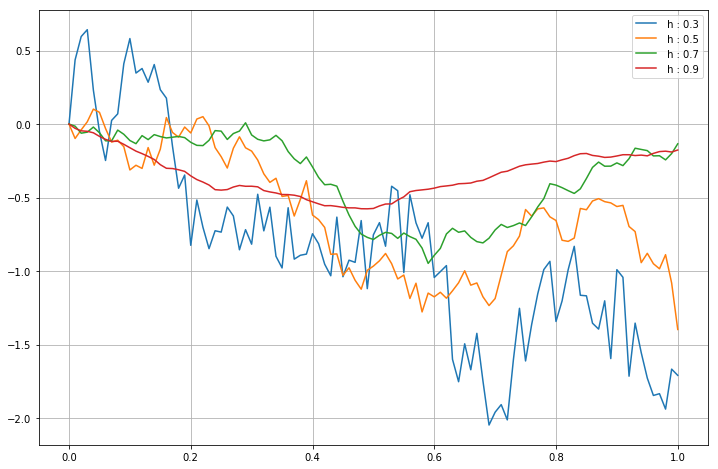

In [28]:
m = 100
delta = 0.01
h_values = np.arange(0.3,1,0.2)
W_values = []
for h in h_values:
    W_values.append(Simu_W2(m, delta, h))
W_values = np.array(W_values)

#### Tracer les graphes
t = delta*np.arange(m+1)
fig = plt.figure( figsize = (12,8))
count = 0
for h in h_values:
    print()
    y = np.concatenate([[0],W_values[count]])
    plt.plot(t, y, label = " h : " + str(h.round(2)))
    count += 1
plt.grid()
plt.legend()
plt.show()


# Exercice 9: simulation par composition

Le but de cet exercice est de simuler une variable $X$ qui s'écrit 
$$
X = p_1 X_1 + \ldots + p_i X_i + \ldots p_m X_m, \qquad p_i \geq 0, \quad \forall i \in \{1,\ldots,m\}, \qquad \sum_{i} p_i = 1,
$$
où $X_1,\ldots,X_m$ sont des variables Gaussiennes de moyennes $m_1,\ldots, m_m$ et de variance $\sigma^2_1,\ldots,\sigma^2_m$.

On note $Z$ la variables qui prend les valeurs $\{1,\ldots,m\}$ avec les probabilités
$$
\mathbb{P}[Z = i ] = p_i, \qquad \forall i \in \{1,\ldots,m\}.
$$
1. Montrer que 
$$
X' = X_{Z},
$$
suit la même loi que $X$. 
2. En utilisant la question précédente, proposer une fonction ``Simu_Melange`` qui simule une réalisations de $X$.

In [29]:
def Simu_Melange(p,ms,sigmas):
    m = p.shape[0]
    x = np.arange(m)
    z = Simu_D(x,p)
    y = ms[z] + sigmas[z] * Simu_G2(1)[0]
    return y
p = np.array([0.1, 0.2, 0.7])
ms = np.array([1, 2, 3])
sigmas = np.array([1, 1, 1])
print(" On obtient la réalisation suivante pour Z : %3.2f " % Simu_Melange(p,ms,sigmas) )

 On obtient la réalisation suivante pour Z : 2.74 


# Exercice 10: arrondi de monnaie au Canada

En 2012, le Canada a décidé d'arrêter la production et simulation des pièces de $1$ cent. Toutefois il est possible de proposer des prix au cent près, la règle en vigueur pour un paiement en espèce est alors un arrondi au multiple de cinq cents le plus proche.

<center>
<img src="./figures/PennyGraph02_f.jpg" style="width: 600px;"/>
    <i>(Source : Ministère des Finances Canada)</i>
</center>

**Attention :** La règle essentielle pour ce qui suit est que lorsqu'un paiement concerne plusieurs produits, l'arrondi se fait sur la somme finale :

<center>
<img src="./figures/PennyGraph01_f.jpg" style="width: 600px;"/>
    <i>(Source : Ministère des Finances Canada)</i>
</center>


* **On se pose la question suivante :**

    * **Question:** Est-ce que de manière générale cette règle est plutôt favorable ou défavorable aux clients? (Est-ce que l'on gagne plus ou moins souvent $1$ ou $2$ cents que l'on en perd?)

&nbsp;

&nbsp;    
    
* **Modélisation:** Pour répondre à cette question, on introduit le modèle simple suivant. On suppose que tous les clients se comportent de la même manière. Pour un client qui achète $N \in \mathbb{N}^*$ produits, on note $R_i$ l'arrondi du panier de notre client après l'achat de $i$ articles et on s'intéresse à $R_N$ l'arrondi du panier à la fin des courses. On remarque 
    * Si $R_N\in\{1,2,6,7\}$, l'arrondi est favorable au client.
    * Si $R_N\in\{3,4,8,9\}$, l'arrondi est favorable au supermarché.

&nbsp;

* On suppose que 
$$
P_{i,j} = \mathbb{P}[R_{n+1} = i |R_n = j] = p_{\big(i-j\big)\;\text{mod}[10]} 
$$

&nbsp;

* Une étude empirique a montré que :
$$
p_0 = 0.071, \quad
p_1 = 0.087, \quad
p_2 = 0.087, \quad
p_3 = 0.024, \quad
p_4 = 0.071, 
$$
$$
\quad p_5 = 0.055, \quad
p_6 = 0.047, \quad
p_7 = 0.346, \quad
p_8 = 0.047, \quad
p_9 = 0.165. \quad
$$

&nbsp;

1. Dans cette première partie, on suppose que $N> 0$ est un entier fixé. 
    1. Quelle est le profit $g(R_N)$ que réalise un client grâce à cette règle en fonction de $R_N$?
    3. Pour chaque client, on a $R_0 = 0$. Proposer une fonction `Simu_R` qui simule une réalisation de $R_N$.
    4. En simulant plusieurs réalisations de la variable $R_N$, programmer une fonction ``Gain_estim_client`` qui estime le gain moyen d'un client. Cette politique est-elle plus en faveur des clients ou non?

In [30]:
def Simu_R(N,p):
    r = 0
    x = np.arange(10)
    for i in range(N):
        p_bis = np.concatenate([p[10-r:],p[:10-r]])
        r = Simu_D(x,p_bis)
    return r
N = 5
p = np.array([0.01, 0.1, 0.1, 0.01, 0.05, 
     0.01, 0.01, 0.6, 0.01, 0.1])
print(" On obtient la réalisation suivante pour R_N : %3.2f " % Simu_R(N,p) )

 On obtient la réalisation suivante pour R_N : 4.00 


In [31]:
def g(r):
    if (r == 1) or (r == 2) or (r == 6) or (r == 7):
        return 10
    elif (r == 3) or (r == 4) or (r == 8) or (r == 9):
        return -10
    else:
        return 0
    
def Gain_estim_client(g):
    res = 0.
    for i in range(1000):
        r = Simu_R(N,p)
        res += g(r)
    return res/1000.

estimated_gain = Gain_estim_client(g)
print(" Le gain estimé est %3.3f." % estimated_gain )

 Le gain estimé est 0.110.


2. Dans cette partie, on suppose toujours que $N> 0$ est un entier fixé.  
    1. Ecrire une fonction ``Contruire_mat_trans`` qui renvoie la matrice de transition $P = (P_{i,j})_{1 \leq i,j \leq n}$, i.e.
    $$
    P =
    \phantom{\begin{matrix} 0 \end{matrix}}
    \begin{matrix}
    0\\ 1 \\ 2 \\ \\ \vdots \\ \\ \\ \\ \\ 9
    \end{matrix}
    \begin{pmatrix}
    p_0 & p_1 & p_2 & \dots & & & p_9\\
    p_9 & p_0 & p_1 & \dots & & & p_8\\
    p_8 & p_9 & p_0 & \dots & & & p_7\\
     & & & & & & \\
     & & & & & & \\
     & &  & \vdots & & & \\
      & & & & & & \\
     & & & & & & \\
    p_2 & p_3 & p_4  & \dots & & & p_1\\
    p_1 & p_2 & p_3   &\dots & & & p_0\\
    \end{pmatrix}.
    $$
    2. Montrer que le profit moyen d'un client est 
    $$
    \mathbb{E}[G_N] = e_0 \times P^N \times g, \quad e_0 = \big(1,0,\ldots,0\big), \quad g = \big(g(0),\ldots,g(1)\big).
    $$
    3. En utilisant la question précédente, écrire une fonction ``Gain_client`` qui renvoie le gain moyen du client.

In [32]:
def Contruire_mat_trans(p):
    ## Covariance Matrix
    mat_trans = np.zeros((10,10))
    for r in range(10): # i = 2
        p_bis = np.concatenate([p[10-r:],p[:10-r]])
        mat_trans[r,:] = p_bis
    return mat_trans
print(" La matrice de transition P est : \n %s " % Contruire_mat_trans(p).round(3) )

 La matrice de transition P est : 
 [[0.01 0.1  0.1  0.01 0.05 0.01 0.01 0.6  0.01 0.1 ]
 [0.1  0.01 0.1  0.1  0.01 0.05 0.01 0.01 0.6  0.01]
 [0.01 0.1  0.01 0.1  0.1  0.01 0.05 0.01 0.01 0.6 ]
 [0.6  0.01 0.1  0.01 0.1  0.1  0.01 0.05 0.01 0.01]
 [0.01 0.6  0.01 0.1  0.01 0.1  0.1  0.01 0.05 0.01]
 [0.01 0.01 0.6  0.01 0.1  0.01 0.1  0.1  0.01 0.05]
 [0.05 0.01 0.01 0.6  0.01 0.1  0.01 0.1  0.1  0.01]
 [0.01 0.05 0.01 0.01 0.6  0.01 0.1  0.01 0.1  0.1 ]
 [0.1  0.01 0.05 0.01 0.01 0.6  0.01 0.1  0.01 0.1 ]
 [0.1  0.1  0.01 0.05 0.01 0.01 0.6  0.01 0.1  0.01]] 


In [33]:
def Gain_client(p,N):
    P = Contruire_mat_trans(p)
    P_N = np.linalg.matrix_power(P,N)
    g_N = np.zeros(10)
    for r in range(10):
        g_N[r] = g(r)
    return np.dot(P_N[0,:],g_N)
print(Gain_client(p,N))

0.30949158


3. Dans cette partie, on suppose que le nombre $N$ achetés par un client suit une loi de Poisson de paramètre $\lambda = 10$ indépendante de $R_N$. En simulant plusieurs réalisations de $R_N$, écrire une fonction ``Gain_estimN_client`` qui estime le gain de l'agent dans ce cas.

In [34]:
def Gain_estimN_client(lambda_0,g):
    res = 0.
    for i in range(1000):
        N = Simu_Poisson(lambda_0)
        r = Simu_R(N,p)
        res += g(r)
    return res/1000.
lambda_0 = 20
estimated_gain = Gain_estimN_client(lambda_0,g)
print(" Le gain estimé est %3.3f." % estimated_gain )

 Le gain estimé est -0.170.
